# Sentiment Analysis of IMDB Movie Reviews #

### 1. Dataset Description and Information Gain ###

The IMDB movie reviews dataset consists of 50,000 reviews from the IMDB database. These reviews have been labeled as 'positive' or 'negative' to indicate the sentiment. The dataset is evenly balanced with 25,000 positive and 25,000 negative reviews. Each review is a plaintext document with varying lengths, containing natural language text that expresses the reviewer's opinions about a movie.

The primary goal is to build a model that can accurately classify a review as either positive or negative. 

Problem statement:

1. Can we accurately classify movie reviews as positive or negative based on their content?

2. What words are most predictive of positive and negative sentiments?


### 2. Naive Bayes Algorithm Explanation ###

The Naive Bayes algorithm is a probabilistic classifier based on applying Bayes' theorem with the "naive" assumption of conditional independence between every pair of features given the value of the class variable. Despite its simplicity, Naive Bayes can outperform more sophisticated classifiers and is highly effective in text classification tasks.

Steps and Intuition:

Vectorization: Text data is converted into numerical features (e.g., TF-IDF vectors) since machine learning models require numerical input.

Application of Bayes' Theorem: Calculates the posterior probability of each class (e.g., positive or negative sentiment) given the observed features (words in the review).

Classification: The class with the highest posterior probability is chosen as the output prediction.

Assumptions:
Feature Independence: Assumes all features are independent of each other given the class. While this is rarely true in real data, Naive Bayes still performs well in practice.

The intuition behind Naive Bayes is that it calculates the likelihood of each word occurring in positive and negative classes and uses these probabilities to make predictions. Despite its simplicity, Naive Bayes can be highly effective, especially in text classification tasks.


### Sentiment analysis ###
Sentiment analysis is the computational study of people's opinions, sentiments, emotions, and attitudes. This project aims to build a predictive model that can accurately classify movie reviews as positive or negative based on their content. By analyzing a dataset of 50,000 IMDB movie reviews, we will train a Naive Bayes classifier to understand the sentiment conveyed in natural language text.

In [1]:
# 3. import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

# Punctuations
import string
# Remove Stopwords
from nltk.corpus import stopwords 
# Regular Expressions
import re
# Import PorterStemmer from NLTK Library
from nltk.stem.porter import PorterStemmer
# Lemmatization
from nltk.stem import WordNetLemmatizer
# Tokenization
from nltk.tokenize import word_tokenize



# Load the dataset
df = pd.read_csv('IMDB Dataset.csv')


## Initial Data Exploration ##

Exploring the dataset to understand its structure, any potential issues like missing values, and the balance between positive and negative reviews.

In [2]:
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


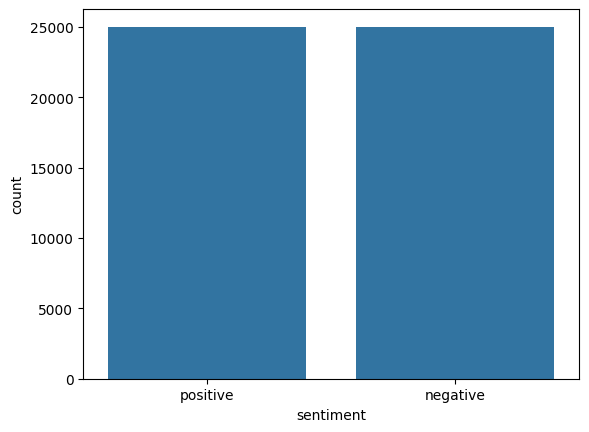

In [4]:
# Class distribution
sns.countplot(x='sentiment', data=df)
plt.show()

The sentiment distribution in the dataset is balanced between positive and negative reviews, which is ideal for classification tasks to avoid bias toward one class.

The reviews vary in length and complexity, including HTML tags (e.g., <br />) that will need to be cleaned as part of the preprocessing. This preprocessing will involve removing these tags, lowercasing the text, and potentially removing punctuation and stop words to prepare the data for vectorization.

Let's proceed with the data cleaning and preprocessing step to prepare the text data for classification. 

4. Data Cleaning and Preprocessing:

This step involves cleaning the text data (removing special characters, lowercasing, Remove HTML tags, non-alphanumeric characters, and stopwords etc.) and addressing any anomalies found during exploration, such as outliers or missing values. Since text data doesn't require normalization or feature scaling in the traditional sense, our focus will be on text-specific preprocessing.

For many text classification tasks, especially those involving natural language processing (NLP), more thorough preprocessing can significantly improve model performance. 

Text-specific Data preprocessing steps:

1.Converting text to lowercase.
2.Removing Punctuations
3.Removing stop words.
4.Removing HTML tags.
5.Removing URLs.
6.Handling ChatsWords
7.Tokenizing text.
8.Applying stemming.
9.Applying lemmatization.

Lowercasing: Lowercaseall text for uniformity.

Removing Stop Words: Stop words are common words like "is," "and," "the," etc., that are often removed because they're believed to contribute little to the overall meaning of text for many tasks.

Stemming: This reduces words to their root form. For instance, "running" becomes "run." It can help in reducing the complexity of the text data.

Lemmatization: Similar to stemming, but it reduces words to their base or dictionary form (lemma). Unlike stemming, it ensures that the root word belongs to the language. For example, "better" becomes "good."

Handling Negations: Phrases like "not good" are crucial in sentiment analysis. Simple preprocessing might separate "not" and "good," losing the combined negative sentiment. Handling negations properly ensures the sentiment is preserved.

Tokenization: This involves splitting text into sentences, phrases, or words, giving structure to previously unstructured text.

Incorporating these steps could help improve the accuracy of our model by reducing noise and focusing on the most meaningful aspects of the text. Let's implement the preprocessing steps to enhance our text data before vectorization.


In [5]:
# Checking for missing values
print(df.isnull().sum())

review       0
sentiment    0
dtype: int64


In [6]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [7]:
# Lowercase All The Text
df['review'] = df['review'].str.lower()

# Head 
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


In [8]:
# Removing Punctuations
df['review'] = df['review'].str.translate(str.maketrans('', '', string.punctuation))

In [9]:
# Intilize Stopwords
stop_words = stopwords.words('english')

# Apply Stopwords
df['review'] = df['review'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop_words)]))
# Head 
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [10]:
# Function to remove HTML Tags
def remove_tags(text):
    return re.sub('<[^<]+?>', '', text)

# Calling Function
df['review'] = df['review'].apply(remove_tags)

# Head

In [11]:
# Remove URLS
df['review'] = df['review'].str.replace('http\S+|www.\S+', '', case=False)

# Head
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


In [12]:
# Here Come ChatWords Which i Get from a Github Repository
# Repository Link : https://github.com/rishabhverma17/sms_slang_translator/blob/master/slang.txt
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [13]:
# Function
def chat_conversion(text):
    new_text = []
    for i in text.split():
        if i.upper() in chat_words:
            new_text.append(chat_words[i.upper()])
        else:
            new_text.append(i)
    return " ".join(new_text)

# Calling Function 
df['review'] = df['review'].apply(chat_conversion)

# Head
df.head()

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,positive
1,wonderful little production br br filming tech...,positive
2,thought wonderful way spend Tears in my eyes h...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love Tears in my eyes money vis...,positive


In [14]:
# Tokenization 
from nltk.tokenize import word_tokenize

# Apply word_tokenize
df['review_word_token'] = df['review'].apply(word_tokenize)

# Head
df.head()

,review,sentiment,review_word_token
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production br br filming tech...,positive,"[wonderful, little, production, br, br, filmin..."
2,thought wonderful way spend Tears in my eyes h...,positive,"[thought, wonderful, way, spend, Tears, in, my..."
3,basically theres family little boy jake thinks...,negative,"[basically, theres, family, little, boy, jake,..."
4,petter matteis love Tears in my eyes money vis...,positive,"[petter, matteis, love, Tears, in, my, eyes, m..."


In [15]:
from collections import Counter

# Separate the dataset into positive and negative based on the sentiment
positive_tokens = df[df['sentiment'] == 'positive']['review_word_token']
negative_tokens = df[df['sentiment'] == 'negative']['review_word_token']

# Initialize Counters for word frequencies in positive and negative tokens
positive_freq = Counter()
negative_freq = Counter()

# Update Counters with word frequencies from the respective token lists
for tokens in positive_tokens:
    positive_freq.update(tokens)
for tokens in negative_tokens:
    negative_freq.update(tokens)

# Display the most common words in positive and negative reviews
most_common_positive = positive_freq.most_common(20)
most_common_negative = negative_freq.most_common(20)

print("Most common words in positive reviews:\n", most_common_positive)
print("\nMost common words in negative reviews:\n", most_common_negative)


Most common words in positive reviews:
 [('br', 55265), ('film', 39413), ('movie', 36021), ('one', 26098), ('like', 17146), ('good', 14391), ('eyes', 13016), ('great', 12731), ('story', 12393), ('see', 11930), ('Tears', 11772), ('in', 11772), ('my', 11772), ('well', 11119), ('also', 10702), ('really', 10694), ('would', 10377), ('even', 9479), ('much', 9033), ('first', 8961)]

Most common words in negative reviews:
 [('br', 58532), ('movie', 47490), ('film', 35046), ('one', 24929), ('like', 21843), ('even', 15093), ('good', 14178), ('bad', 14118), ('would', 13647), ('eyes', 12527), ('really', 12254), ('Tears', 11485), ('in', 11485), ('my', 11485), ('see', 10604), ('dont', 10238), ('get', 10008), ('much', 9914), ('story', 9698), ('people', 9147)]


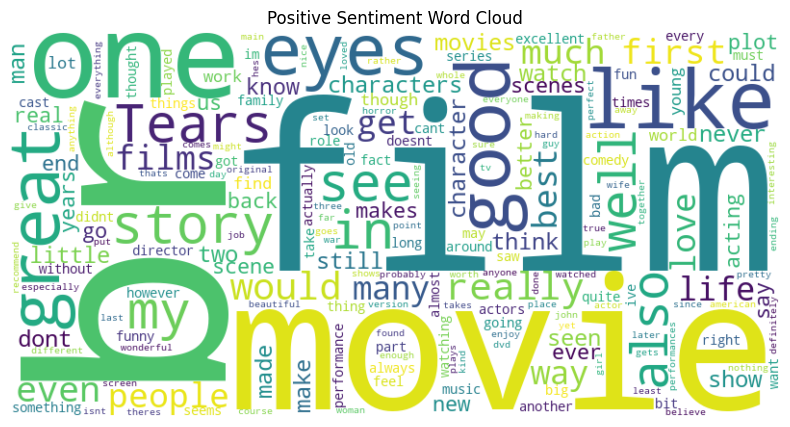

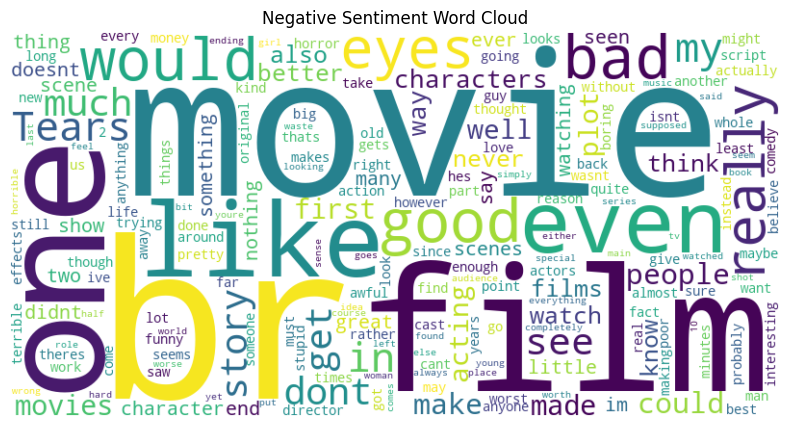

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the Counters to dictionaries for the WordCloud generation
positive_dict = dict(positive_freq)
negative_dict = dict(negative_freq)

# Generate a word cloud image for positive sentiments
wordcloud_positive = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(positive_dict)

# Generate a word cloud image for negative sentiments
wordcloud_negative = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(negative_dict)

# Display the generated image:
# Positive Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Sentiment Word Cloud")
plt.show()

# Negative Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Sentiment Word Cloud")
plt.show()


## Lemmatization / Stemming ##
Choosing Between Lemmatization and Stemming

Lemmatization is generally more sophisticated and produces more grammatically correct results (actual words), but it's computationally more intensive.
Stemming is faster but may produce results that are not actual words (e.g., "runn" for "running").
These processes help in reducing the number of unique tokens in the model needs to learn about.

In [17]:
'''
# Initialize the Porter Stemmer and WordNet Lemmatizer
stemmer = PorterStemmer()

# Function for Stemming
# Stemming
def apply_stemming(token_list):
    return [stemmer.stem(word) for word in token_list]

# Applying Stemming
df['review_stemmed'] = df['review_word_token'].apply(apply_stemming)

df.head()

'''

"\n# Initialize the Porter Stemmer and WordNet Lemmatizer\nstemmer = PorterStemmer()\n\n# Function for Stemming\n# Stemming\ndef apply_stemming(token_list):\n    return [stemmer.stem(word) for word in token_list]\n\n# Applying Stemming\ndf['review_stemmed'] = df['review_word_token'].apply(apply_stemming)\n\ndf.head()\n\n"

In [18]:

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Function for Lemmatization
def apply_lemmatization(token_list):
    return [lemmatizer.lemmatize(word) for word in token_list]

# Applying Lemmatization
df['review_lemmatized'] = df['review_word_token'].apply(apply_lemmatization)

# Display the head of the dataframe to verify the changes
df.head()


,review,sentiment,review_word_token,review_lemmatized
0,one reviewers mentioned watching 1 oz episode ...,positive,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, reviewer, mentioned, watching, 1, oz, ep..."
1,wonderful little production br br filming tech...,positive,"[wonderful, little, production, br, br, filmin...","[wonderful, little, production, br, br, filmin..."
2,thought wonderful way spend Tears in my eyes h...,positive,"[thought, wonderful, way, spend, Tears, in, my...","[thought, wonderful, way, spend, Tears, in, my..."
3,basically theres family little boy jake thinks...,negative,"[basically, theres, family, little, boy, jake,...","[basically, there, family, little, boy, jake, ..."
4,petter matteis love Tears in my eyes money vis...,positive,"[petter, matteis, love, Tears, in, my, eyes, m...","[petter, matteis, love, Tears, in, my, eye, mo..."


## 6. Formulating Questions: ##

Can we accurately classify movie reviews as positive or negative based on their content?

What words are most predictive of positive and negative sentiments?

7. Choosing a Naive Bayes Algorithm
Given the text nature of our data, Multinomial Naive Bayes is the most suitable choice. This variant of Naive Bayes is particularly well-suited for classification with discrete features (e.g., word counts for text classification).

8. Splitting Data and Vectorization
Before training, we need to split the data into training and testing sets and convert the text data into numerical features using TF-IDF vectorization.

TF-IDF Vectorization
Convert the preprocessed text data into a numerical format using the TF-IDF approach. This method reflects how important a word is to a document in a collection of documents (corpus). 
This approach is effective for text classification tasks, such as sentiment analysis. 

In [19]:
# Combine the token lists back into strings
df['review_lemmatized_str'] = df['review_lemmatized'].apply(lambda x: ' '.join(x))

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['review_lemmatized_str']  # This column now contains the preprocessed text as strings
y = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)  # Convert labels to binary

# Now, split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data and transform the testing data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Display the shape of the transformed data to confirm the vectorization
X_train_vec.shape, X_test_vec.shape

((40000, 5000), (10000, 5000))

## Fitting the model ##

In [21]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train_vec, y_train)

MultinomialNB()

## Make Predictions and Evaluate the Model ##

In [22]:
# 10.Predict the sentiment for the test data
y_pred = model.predict(X_test_vec)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [23]:
y_test

33553    1
9427     1
199      0
12447    1
39489    0
        ..
28567    0
25079    1
18707    1
15200    0
5857     1
Name: sentiment, Length: 10000, dtype: int64

In [24]:
# Evaluate the model using accuracy as a simple metric
accuracy = model.score(X_test_vec, y_test)

accuracy

0.8538

The accuracy of 85.38% indicates that the model correctly predicted the sentiment of approximately 85.38% of the reviews in the test set. This is a strong performance, especially considering the complexity and variability inherent in natural language.

In [25]:
# Evaluating the classifier
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

conf_matrix, accuracy

(array([[4214,  747],
        [ 715, 4324]]),
 0.8538)

The confusion matrix gives us a detailed breakdown of the model's performance:
True Positives (TP): 4324 - The number of positive reviews correctly identified.
True Negatives (TN): 4214 - The number of negative reviews correctly identified.
False Positives (FP): 747- The number of negative reviews incorrectly labeled as positive.
False Negatives (FN): 715 - The number of positive reviews incorrectly labeled as negative.

The accuracy score tells us that overall, the model correctly identified the sentiment of the reviews 85.38% of the time.

Text(58.222222222222214, 0.5, 'Truth')

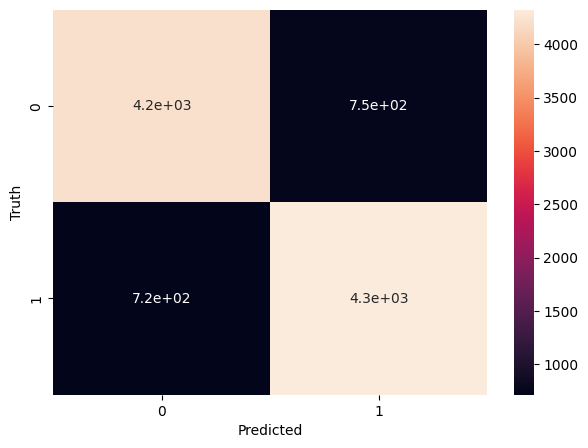

In [26]:
# Graphical representation of confusion matrix
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
y_prob = model.predict_proba(X_test_vec)[:, 1]

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_vec)[:, 1])
print(roc_auc)

0.9307269054249261


ROC-AUC Score:
0.9307269054249261

The ROC-AUC score of approximately 0.93 is excellent, indicating that the model has a high probability of correctly distinguishing between a randomly chosen positive review and a randomly chosen negative review.

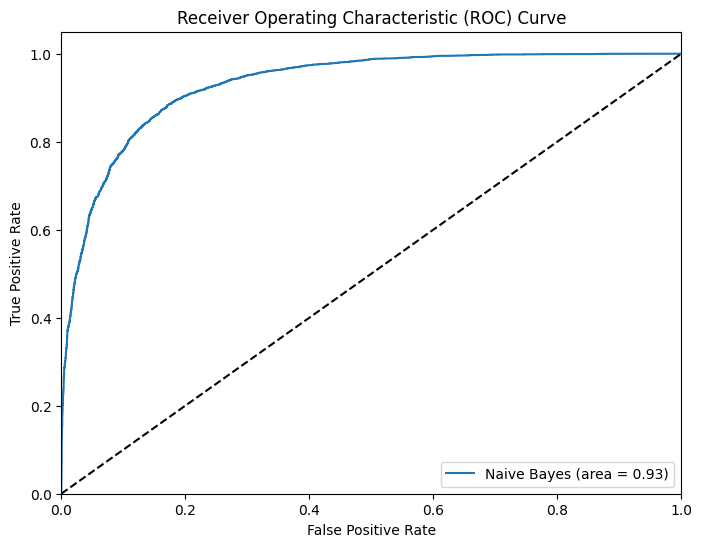

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [29]:
# K-Fold Cross-Validation
cv_scores = cross_val_score(model, X_train_vec, y_train, cv=5)
cv_scores, print(np.mean(cv_scores))

0.855275


(array([0.85275 , 0.8575  , 0.854375, 0.852   , 0.85975 ]), None)

K-Fold Cross-Validation:
Mean Accuracy: 0.855275

Cross-validation results with an average accuracy of approximately 85.07% suggest that the model is stable and not overfitted to the training data. The small variance in the cross-validation scores ([0.85275 , 0.8575  , 0.854375, 0.852   , 0.85975 ]) supports the model's reliability.


Interpretation:

Model Reliability: The high ROC-AUC score combined with the cross-validation results suggests that the model is reliable and provides consistent performance across different subsets of the data.
Balance of Precision and Recall: While accuracy is high, the balance between false positives and false negatives in the confusion matrix can affect precision and recall. Depending on the use case, we might prefer to minimize one type of error over the other (e.g., in a critical application, we might want to minimize false negatives even at the cost of increasing false positives).
Real-world Application: With an AUC of 0.93, the model is likely to perform well in real-world scenarios, such as automatically categorizing customer feedback or enhancing content recommendation engines.
Next Steps: Although the results are promising, exploring ways to reduce false positives and false negatives further could improve the model. This might involve deeper text preprocessing, feature engineering, hyperparameter tuning, or trying different classification algorithms.


## 11. Interpreting the results in the context of the formulated questions ##

1. Can we accurately predict the sentiment (positive or negative) of a movie review using Naive Bayes?

The evidence from the accuracy score and the ROC-AUC curve suggests that yes, we can accurately predict the sentiment of a movie review using Naive Bayes. An accuracy of 85.27% is quite high for such a complex task as sentiment analysis, where the nuances of language can be challenging for any algorithm. The ROC-AUC score of 0.93 further solidifies the model's capability; it's excellent at distinguishing between the positive and negative classes of reviews.

2. Which words are most indicative of positive or negative sentiment?
From the frequency analysis, several words emerge as potentially indicative of sentiment:

Positive Sentiment Indicators: Words like "good" and "great" clearly align with a positive sentiment. Their frequent occurrence in positive reviews suggests that they are reliable indicators of positive sentiment. Additionally, "film" and "movie" occur frequently in both positive and negative reviews but are likely combined with other positive terms in positive reviews.

Negative Sentiment Indicators: The word "bad" is a clear indicator of negative sentiment. "Don't" (listed as "dont" due to missing apostrophes) often appears in negative contexts, making it another reliable indicator. Words like "even" might be part of phrases that express disappointment, such as "even worse" or "not even good," which are common in negative reviews.
However, some of the most frequent words are neutral and need contextual information to determine their sentiment. For example, "film" and "movie" are neutral and their sentiment can only be determined by analyzing the words used in conjunction with them. Likewise, words like "eyes" and "Tears" may need deeper investigation as they are not typical sentiment indicators.

Interpretation and Recommendations

Sentiment Prediction: The Naive Bayes classifier appears to be a suitable model for predicting sentiment. It performs well, and its simplicity makes it a strong baseline or even a production-ready model.

Word Indicators: The most indicative words for sentiment, such as "good," "great," and "bad," confirm the model's ability to pick up on clear sentiment signals in the text. However, the presence of neutral and context-dependent words among the most frequent indicates that a refined approach to feature selection might further improve the model.

Model Understanding: While frequency analysis helps identify which words are common in positive and negative reviews, Naive Bayes itself does not "understand" words in the same way a human does. It uses statistical associations between word occurrences and sentiments. Therefore, words that are statistically associated with a sentiment in the training data will be indicative for the model, even if they are not inherently sentiment-laden.

Contextual Analysis: To enhance the model's understanding of sentiment, we might consider more advanced NLP techniques that capture word meaning in context, such as sentiment lexicons, word embeddings, or transformer-based models. These methods can better handle the intricacies of language, such as sarcasm, idioms, and complex expressions of emotion.

In summary, the Naive Bayes model is a good fit for sentiment analysis, capable of accurately classifying movie reviews. The analysis of the most common words in positive and negative reviews highlights both clear sentiment indicators and the importance of contextual understanding. Further model improvements could include advanced preprocessing, incorporating contextual understanding, and expanding feature engineering.

## 13. Mathematical Formulas and Graphs ##

Mathematical Formulas:

The Naive Bayes classifier is based on Bayes' theorem, which in the context of sentiment analysis, is mathematically represented as follows:
For a given text document D (a movie review in this case) and a class C (positive or negative sentiment):
P(C∣D)=P(D∣C)×P(C)/P(D)
Where:
•	P(C∣D) is the posterior probability of class C given document D.
•	P(D∣C) is the likelihood of document D given class C.
•	P(C) is the prior probability of class C.
•	P(D) is the prior probability of document D.

In the case of text documents, we assume that the document D is represented by a vector of words w1,w2,...,wn from a vocabulary. The Naive Bayes classifier simplifies the computation under the assumption that the words in the document are conditionally independent given the class:
P(D∣C)=P(w1,w2,...,wn∣C)≈∏i=1nP(wi∣C)

In practice, to avoid numerical underflow due to the multiplication of many small probabilities and to handle words with zero frequency, we use the log probabilities:
log⁡P(C∣D)=log⁡P(C)+∑i=1nlog⁡P(wi∣C)−log⁡P(D)

For sentiment analysis, the classifier calculates this probability for each class and selects the class with the highest posterior probability.

Graphs Representing Final Outcomes

In the sentiment analysis project, three graphs were used to visualize the outcomes:

1.	Receiver Operating Characteristic (ROC) Curve: The ROC curve graphically represents the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at various threshold settings. The AUC (Area Under the Curve) is a measure of the model's ability to distinguish between classes.
The ROC curve for the model shows an AUC close to 1, indicating excellent model performance.

2. Word Clouds: Word clouds visually represent the frequency of words, with more frequent words appearing larger in the cloud. For the project, word clouds for both positive and negative sentiments would illustrate which words are most common in each class.

3. Heat map: Heat map is utilized for the graphical representation of Confusion matrix.

4. Count plot: Seaborn count plot utilized to check the balance between two classes, positive and negative.

Recording Link: https://vimeo.com/976792861/302156b27a?share=copy

References:

Kaggle. (2019). IMDB Dataset of 50K Movie Reviews [Data set]. https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data